# Introduction


The steps in this notebook are:
1. handle missing values


In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import random as rnd


#visualization
import matplotlib.pyplot as plt
import missingno
import sklearn

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Path of the file to read. 
train_path = '../input/home-data-for-ml-course/train.csv'
test_path = '../input/home-data-for-ml-course/test.csv'

train = pd.read_csv(train_path,index_col='Id')
test = pd.read_csv(test_path,index_col='Id')
display(train)
display(test)

# set target variable
target = 'SalePrice'

# remove any missing target row in train since it won't be a training data.
train.dropna(subset=[target], inplace=True)
#display(train)

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/train.csv


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


## 1. Data cleaning: Missing values.

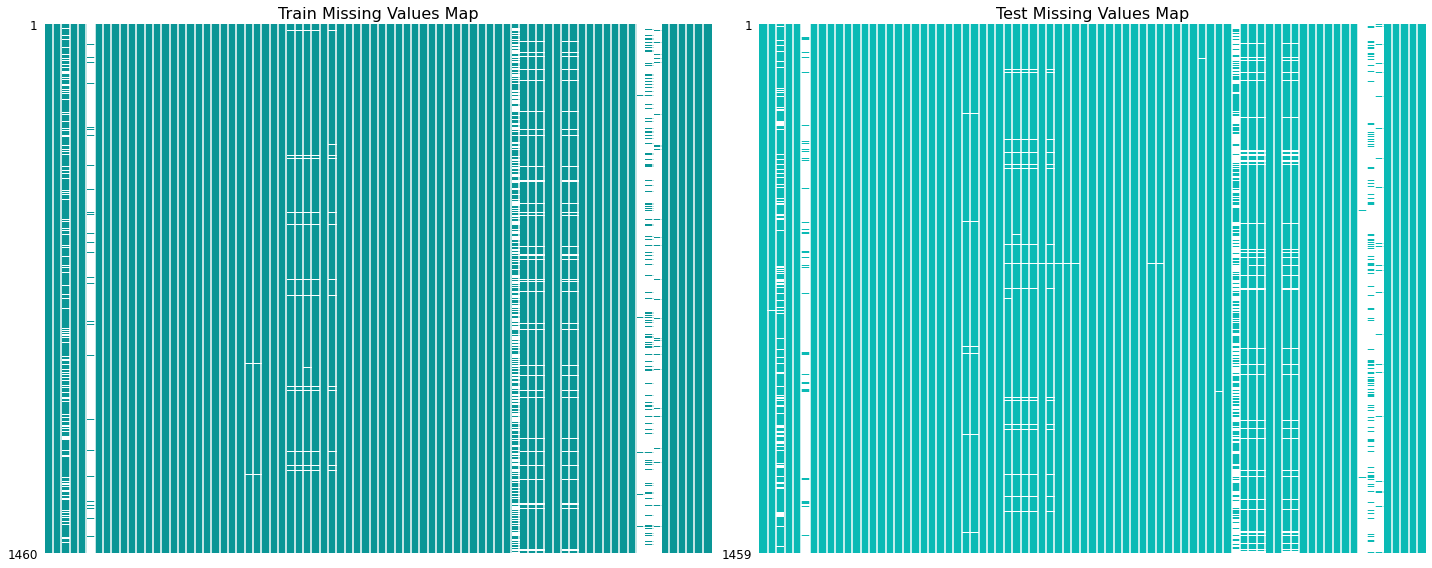

In [2]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
missingno.matrix(train, ax = ax1, color=(10/255, 150/255, 150/255), fontsize=10, sparkline=False)
missingno.matrix(test, ax = ax2, color=(10/255, 186/255, 181/255), fontsize=10, sparkline=False)
ax1.set_title('Train Missing Values Map', fontsize = 16)
ax2.set_title('Test Missing Values Map', fontsize = 16)
fig.tight_layout()

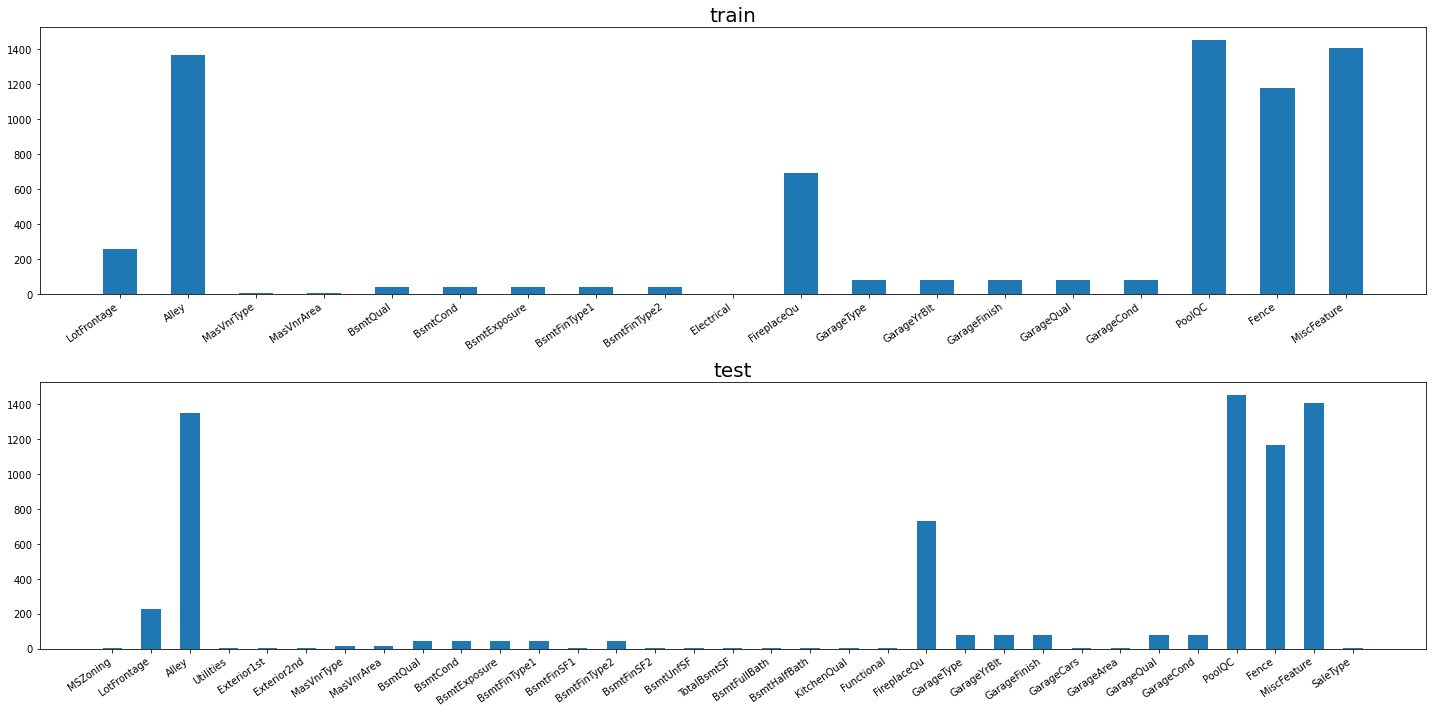

In [3]:
#train.info() # test.info() # give non-missing count and data types
# How many missing values in each column
train_null=train.isnull().sum()[train.isnull().sum()>0]
test_null=test.isnull().sum()[test.isnull().sum()>0]
#print('Train: \n',  train_null) # if the target: SalePrice has missing then drop
#print('\nTest: \n', test_null)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20,10))
width=0.5 
for axes, data, d_label in zip([ax1,ax2], [train_null, test_null], ['train', 'test']):
    axes.bar(np.arange(len(data)), data, width, label='missing train')
    axes.set_xticks(np.arange(len(data)))
    axes.set_xticklabels(data.index, rotation=35, ha="right")
    axes.set_title(d_label, fontsize=20)
# ax1.bar(np.arange(len(train_null)), train_null, width, label='missing train')
# ax1.set_xticks(np.arange(len(train_null)))
# ax1.set_xticklabels(train_null.index, rotation=35, ha="right")

# ax2.bar(np.arange(len(test_null)), test_null, width, label='missing test')
# ax2.set_xticks(np.arange(len(test_null)))
# ax2.set_xticklabels(test_null.index, rotation=35, ha="right")
fig.tight_layout()
del train_null, test_null

### combine train and test

In [4]:
## get_dummies is a quicker approach for category data preprocessing
GET_dummies =False 
# If true, get_dummies will quickly produce the one hot encoding for the categorical variables.
# else, will mannully convert nan to unknown and investigate whether too many categories to do one hot. 

#combine train, test
train['which']='train'; test['which']='test'
#fill target variable of test to be 0, later after preprocessing we delete it.
test[target] =0
df = pd.concat([train, test])



### make drops

In [5]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,which
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,train
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,train
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,train
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,train
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,6,2006,WD,Normal,0,test
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0,test
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0,test


In [6]:
# dropping columns with missing entries >0.67
bad_col = df.isnull().sum()[df.isnull().sum()>df.shape[0]*0.67].index
df.drop(bad_col, axis=1,inplace=True)


# find category/numeric columns
cat_col =  df.select_dtypes(include = 'object').columns
num_col = set(df.columns)-set(cat_col)

# drop the column indicating train/test
cat_col = cat_col.drop('which')

# find null columns
null_col = df.isnull().sum()[df.isnull().sum()>0].index

# get categorical null columns
null_cat = df[null_col].select_dtypes(include = 'object').columns
# another way 
# [x for x in dict(df[null_col].dtypes) if dict(df[null_col].dtypes)[x] in ['object']] 


# get numerical null columns
null_num = list(set(null_col)-set(null_cat))

### encoding(fillna) ALL for category columns
use *cat_col* since we operate on all columns (if only work on null columns, will use *null_cat*

In [7]:

if GET_dummies:   # Method 1 one-hot encoding
    # get dummies will produce the one hot encoding for the categorical variables.
    df_cat = pd.get_dummies(df[cat_col], dummy_na=True)
    # drop the original categorical columns
    df.drop(cat_col,axis=1, inplace=True)
    # merge df with the one-hot encoding df_cat
    df = pd.concat([df,df_cat],axis=1, join='inner')
else:
    # mannully convert nan to unknown and investigate whether too many categories to do one hot. 
    # fill categorical null entries with 'unknown'
    df[null_cat] = df[null_cat].fillna(value = 'unknown')
    
    # perform labelencoding for ALL categorical columns
    # make a copy of all categorical columns
    df_object = df[cat_col]


    from sklearn.preprocessing import LabelEncoder

    label_enc= LabelEncoder()
    for col in df_object.columns:
        df.loc[:,col] = label_enc.fit_transform(df_object[col])
        # df_object.loc[:,col] does not need to be changed
    del df_object, label_enc



### fillna for numeric columns

In [8]:

# Method 1: SimpleImputer does not remove na completely
from sklearn.impute import SimpleImputer
myimputer = SimpleImputer()
df_null_num_imp = pd.DataFrame(myimputer.fit_transform(df[null_num]))
df_null_num_imp.columns=null_num
df.loc[:,null_num]  = df_null_num_imp

del df_null_num_imp, myimputer
print ('remaining numeric na ', df.isnull().sum().sum())


# Method 2:
# fill numerical null entries with mean of the column
df.loc[:,null_num] = df[null_num].fillna(value=df[null_num].mean())
print ('remaining numeric na ', df.isnull().sum().sum())
# del bad_col, null_col, null_cat, null_num

remaining numeric na  11
remaining numeric na  0


# 2. Data Preprocessing

### Normalize columns with numerical values

In [9]:
# https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
# min max scaling
normalize = False
def min_max_scaling(df, df_min, df_max):
    if normalize:
        return (df-df_min)/(df_max - df_min)
    else:
        return df
def min_max_scaling_inver(df, df_min, df_max):
    if normalize:
        return df*(df_max -df_min) + df_min
    else:
        return df
# stardardize 
def standardization(df, df_mean, df_std):
    pass

 
#normalize numeric data to [0,1]
# drop the target variable 'SalePrice' if we don't want to normalize it.
# num_col.discard(target)
df_min = df[num_col].min()
df_max = df[num_col].max()

df.loc[:,num_col] = min_max_scaling(df[num_col], df_min, df_max)
# df[num_col]

### seperate train/test

In [10]:
df_train = df.loc[df['which']=='train'].drop('which', axis=1)
df_test = df.loc[df['which']=='test'].drop(['which',target], axis=1)
df_train.describe()
#df_test.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,3.028767,69.928220,10516.828082,0.995890,1.942466,2.777397,0.000685,3.019178,0.062329,...,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,42.300571,0.632017,22.027061,9981.264932,0.063996,1.409156,0.707666,0.026171,1.622634,0.276232,...,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,20.000000,3.000000,60.000000,7553.500000,1.000000,0.000000,3.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,50.000000,3.000000,69.305795,9478.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,70.000000,3.000000,79.000000,11601.500000,1.000000,3.000000,3.000000,0.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,190.000000,4.000000,313.000000,215245.000000,1.000000,3.000000,3.000000,1.000000,4.000000,2.000000,...,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


# 3. Exploratory data analysis

### Correlation between variables

In [11]:
cor_train = df_train.corr().round(2)
np.fill_diagonal(cor_train.values, 0)
threshold = 0.4
Bigcor_train = (cor_train.abs()> threshold ).any(1)[(cor_train.abs()> threshold ).any(1)==True].index
cor_train =(df_train[Bigcor_train]).corr().round(2).abs()

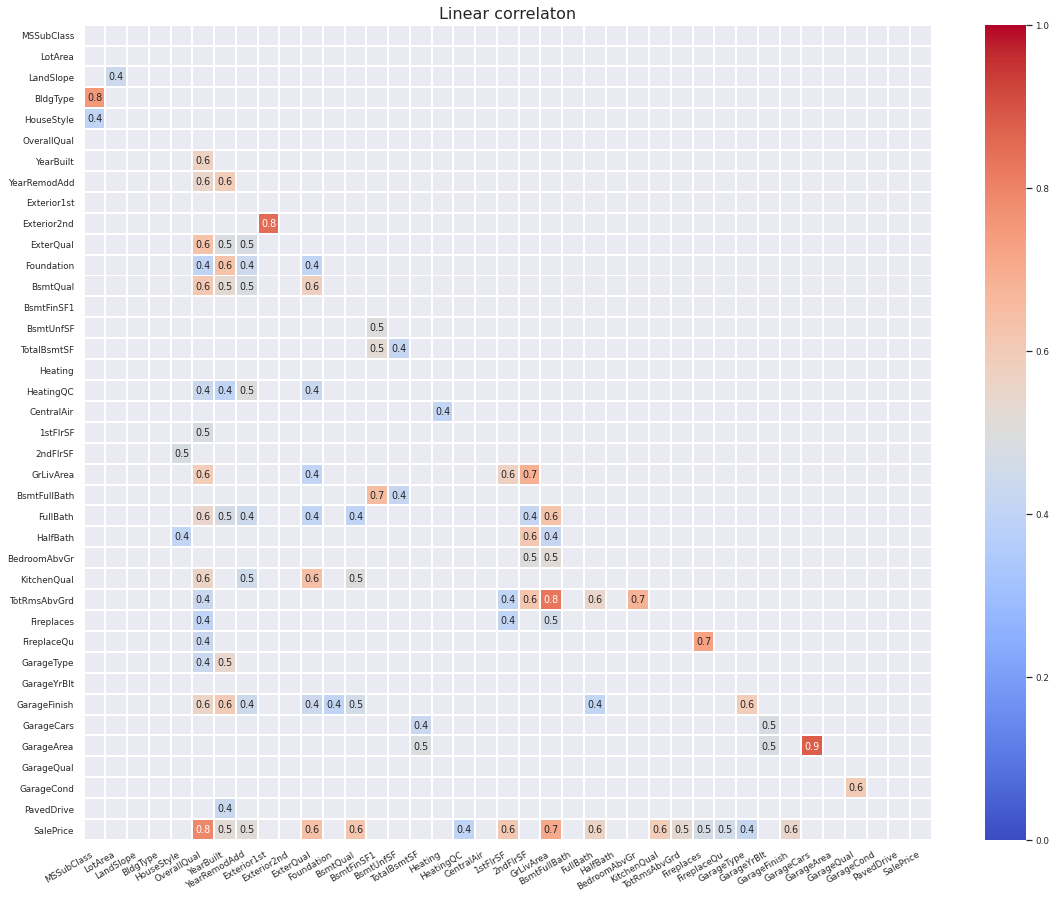

In [12]:
# Display numerical correlations between features on heatmap.
df = cor_train
# generate mask to filter out any number < threshold
mask = np.triu(np.ones_like(df, dtype=np.bool))+ np.array(df.abs()<threshold)
import seaborn as sns
sns.set(font_scale=0.8)
plt.figure(figsize=(19, 15))
sns.heatmap(df, annot=True, fmt='.1f', cmap='coolwarm', mask=mask, linewidths=1, cbar=True)
plt.xticks(rotation=30, ha="right") 
plt.title('Linear correlaton', fontsize=16)
plt.show()

## inspect nonlinearity of numerical variables

In [13]:
# num_col.discard(target)

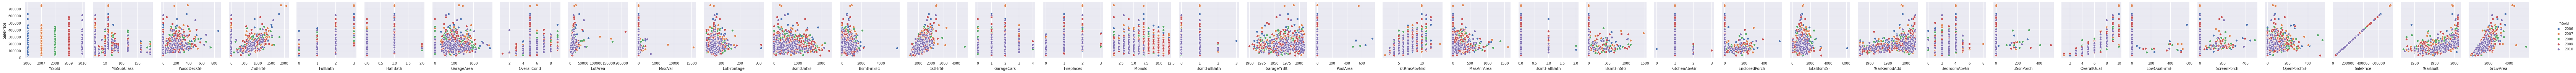

In [14]:
import seaborn as sns


sns.pairplot(data=df_train, y_vars=[target], x_vars=list(num_col), hue = 'YrSold')

### smaller example from seaborn
penguins = sns.load_dataset("penguins")
sns.pairplot(penguins, hue='species')
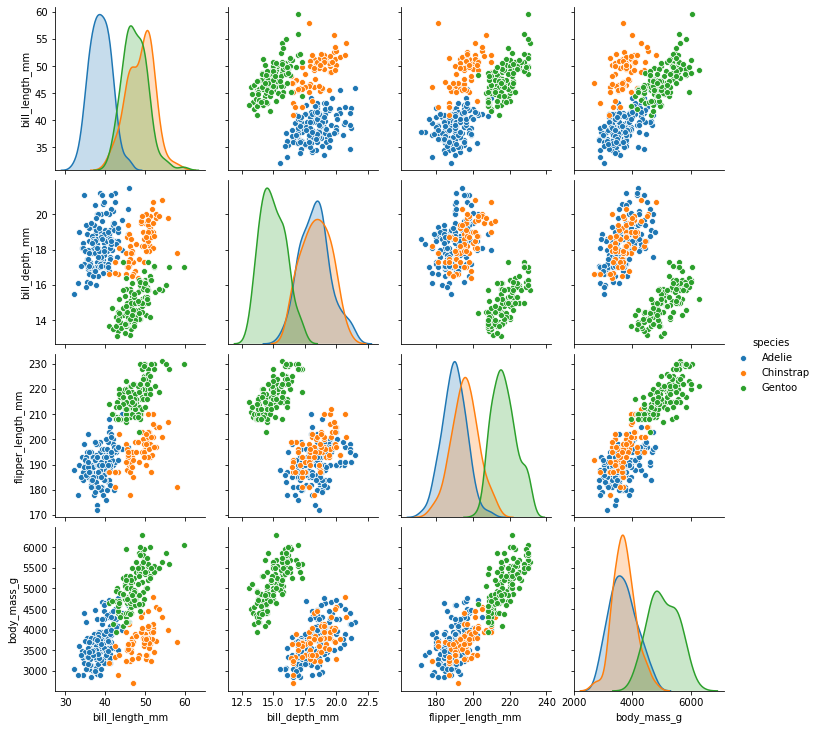

We saw some outliers, we can try to remove them

(1460, 76)


(1366, 76)

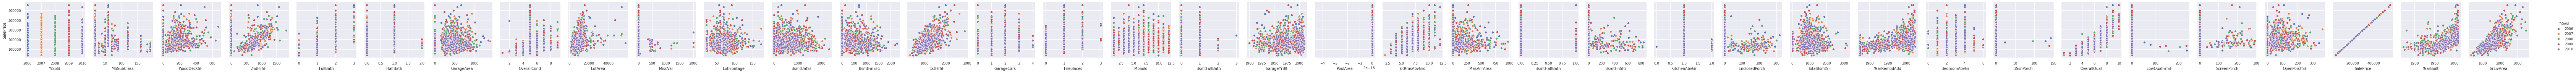

In [15]:
from scipy import stats

print(df_train.shape)
# zscore <5 is better than 4
df_train_nout = df_train[(np.abs(stats.zscore(df_train[num_col])) < 5).all(axis=1)]
df_train = df_train_nout


sns.pairplot(data=df_train_nout, y_vars=[target], x_vars=list(num_col), hue = 'YrSold')

#result = pd.concat([df_tran_nout, df_train], axis=1, join = 'inner')
del df_train_nout
df_train.shape


### If there is clear nonlinearity, we will perform transformations on the data

### Since many features are just noise, we can just remove them to reduce complexity of the model.

In [16]:
print(num_col)
# 14980 improve to 14460
noise_col = ['MiscVal','LowQualFinSF', 'BsmtFinSF2', 'LotFrontage', 'KitchenAbvGr', 'GarageYrBlt', 
             '3SsnPorch', 'MoSold', 'PoolArea', 'MSSubClass', 'EnclosedPorch', 'OpenPorchSF', 'BsmtUnfSF', 'BsmtFinSF1']
#14460 improve to 
noise_col = ['MiscVal','LowQualFinSF', 'BsmtFinSF2', 'LotFrontage', 'KitchenAbvGr', 'GarageYrBlt', 'TotalBsmtSF', 'MasVnrArea', 
             '3SsnPorch', 'MoSold', 'PoolArea', 'MSSubClass', 'EnclosedPorch', 'OpenPorchSF', 'BsmtUnfSF', 'BsmtFinSF1', 'ScreenPorch', 'WoodDeckSF']
df_train.drop(noise_col, axis=1, inplace=True)
df_test.drop(noise_col, axis=1, inplace=True)
df_train.shape

{'YrSold', 'MSSubClass', 'WoodDeckSF', '2ndFlrSF', 'FullBath', 'HalfBath', 'GarageArea', 'OverallCond', 'LotArea', 'MiscVal', 'LotFrontage', 'BsmtUnfSF', 'BsmtFinSF1', '1stFlrSF', 'GarageCars', 'Fireplaces', 'MoSold', 'BsmtFullBath', 'GarageYrBlt', 'PoolArea', 'TotRmsAbvGrd', 'MasVnrArea', 'BsmtHalfBath', 'BsmtFinSF2', 'KitchenAbvGr', 'EnclosedPorch', 'TotalBsmtSF', 'YearRemodAdd', 'BedroomAbvGr', '3SsnPorch', 'OverallQual', 'LowQualFinSF', 'ScreenPorch', 'OpenPorchSF', 'SalePrice', 'YearBuilt', 'GrLivArea'}


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(1366, 58)

# 2/3 feature engineering

In [17]:
from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print("Train set size:", train.shape)
print("Test set size:", test.shape)

train_ID = train['Id']
test_ID = test['Id']
# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

# Deleting outliers
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train.SalePrice.reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

features = pd.concat([train_features, test_features]).reset_index(drop=True)
print(features.shape)
# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

features['Functional'] = features['Functional'].fillna('Typ')
features['Electrical'] = features['Electrical'].fillna("SBrkr")
features['KitchenQual'] = features['KitchenQual'].fillna("TA")
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

features["PoolQC"] = features["PoolQC"].fillna("None")

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')

features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)

features.update(features[objects].fillna('None'))

features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Filling in the rest of the NA's

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics2.append(i)

skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

features = features.drop(['Utilities', 'Street', 'PoolQC', ], axis=1)

features['YrBltAndRemod'] = features['YearBuilt'] + features['YearRemodAdd']
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

# simplified features
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

print(features.shape)
final_features = pd.get_dummies(features).reset_index(drop=True)
print(final_features.shape)

X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(X):, :]

print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 99.94:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

X = X.drop(overfit, axis=1).copy()
df_test = X_sub.drop(overfit, axis=1).copy()

Train set size: (1460, 81)
Test set size: (1459, 80)
(2917, 79)


/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


(2917, 86)
(2917, 333)
X (1458, 333) y (1458,) X_sub (1459, 333)


# 4. Models

In [18]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold, train_test_split, cross_val_score, cross_validate
# # https://scikit-learn.org/stable/modules/model_evaluation.html
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error, r2_score, classification_report, confusion_matrix
# from sklearn.linear_model import LinearRegression

CV_parameters = False # True is want to use cross validation to select hyperparameters

### train/validation split and cross validation scheme

In [19]:
#X = df_train.drop(target, axis=1)
#y = df_train[target]

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# use stratify=y, in split for classification (stratify parameter makes a split so that the proportion 
# of values in the sample produced will be the same as the proportion of values provided)

# 5 fold cv #use StratifiedKFold for classification

cv = KFold(5, shuffle=True, random_state=42)

In [21]:
# define cross-validation scheme
def model_valid(X_train, y_train, estimators, cv, scoring):
    model_table = pd.DataFrame()

    row_index = 0
    for est in estimators:

        #estimator name
        model_table.loc[row_index, 'Model Name'] = est.__class__.__name__

        cv_results = cross_validate(est,
                                    X_train,
                                    y_train,
                                    cv=cv,
                                    scoring= scoring, 
                                    return_train_score=True,
                                    n_jobs=-1)

        model_table.loc[row_index, 'Train score Mean'] = cv_results['train_score'].mean()
        model_table.loc[row_index, 'Test score Mean'] = cv_results['test_score'].mean()
        model_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test score Mean'], ascending=False, inplace=True)
    #print(pd.DataFrame(cv_results))
    return model_table

In [22]:
# grid search plotting. Only works with 2 different parameters. I.e. cv only change two parameters at a time
def plot_grid_search(cv_results, param_dict, grid_param_1, grid_param_2):
    # Get Test Scores Mean and std for each grid search
    list_para= [param_dict[grid_param_1], param_dict[grid_param_2]]
    dim= (len(list_para[1]), len(list_para[0]))
    df = pd.DataFrame(cv_results)
    scores_mean = np.array(df['mean_test_score']).reshape(dim)

    scores_sd = np.array(cv_results['std_test_score']).reshape(dim)

    # Plot Grid search scores
    _, ax = plt.subplots(1,1, figsize=(10,5))

    # Param1 is the X-axis, Param 2 is represented as different curves (color line)
    for idx, val in enumerate(list_para[1]):
        ax.plot(list_para[0], scores_mean[idx,:], '-o', label= grid_param_2+ ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(grid_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')
    
    # Calling Method 
    # plot_grid_search(xgb_grid.cv_results_, parameters, param1, param2)

In [23]:
# plot a single model
def plot_model(model,X_train, y_train, X_valid, y_valid):
    # fit a model
    model.fit(X_train, y_train)
    # goodness of fit
    print('Printing error on the train-valid data:')
    print('Train $R^2$:', model.score(X_train, y_train))
    print('Valid $R^2$:', model.score(X_valid, y_valid))
    y_train_pred = model.predict(X_train)
    y_valid_pred = model.predict(X_valid)
    # MSE
    print( 'Train RMSE: ', mean_squared_error(y_train,  y_train_pred, squared=False) )
    print( 'Valid RMSE: ', mean_squared_error(y_valid,  y_valid_pred, squared=False) )

    # plot the residuals
    fig, axs= plt.subplots(1,2, figsize=(16,8))
    t = range(y_train.shape[0]) # np.arange(0,y_train.shape[0])
    axs[0].plot(t, abs(y_train - y_train_pred), 'r.', label="Train")
    t =  range(y_train.shape[0], y_train.shape[0] +y_valid.shape[0])
    axs[0].plot(t, abs(y_valid - y_valid_pred), 'b.', label="Valid")

    # second subplot zoom in validation error
    axs[1].plot(t, abs(y_valid - y_valid_pred), 'b.', label="Valid")
    
    axs[0].legend(); axs[1].legend()
    axs[0].set_title('Absolute error', fontsize=16); axs[1].set_title('validation error', fontsize=16)
    #axs[0].set_ylim(0, 140000);  axs[1].set_ylim(0, 140000)

    fig.tight_layout()

## Linear regression

In [24]:
from sklearn.linear_model import LinearRegression

## Random forest

In [25]:
from sklearn.ensemble import RandomForestRegressor 

rfr1 = RandomForestRegressor(#n_estimators=100, 
                             criterion='mse', 
                             #max_depth=7, 
                             random_state=0)
parameters =dict(#min_samples_split = [4], 
                 max_depth = [ 12,  13],
                 # min_samples_leaf = [1, 2],
                 n_estimators = [400, 500] ) # 500, 700

cv = KFold(5, shuffle=True, random_state=42)
rfr_grid = GridSearchCV(rfr1,
                        parameters,
                        cv = cv,
                        n_jobs = -1,
                        verbose=0)
if CV_parameters:
    rfr_grid.fit(X, y)

    # print/plot cv results
    print(rfr_grid.best_params_)

    plot_grid_search(rfr_grid.cv_results_, parameters, 'n_estimators', 'max_depth')
    # pd.DataFrame(rfr_grid.cv_results_)
else:
    pass

#### random forest with best cv parameters

In [26]:
rfr1 = RandomForestRegressor(n_estimators=500, 
                             criterion='mse', 
                             max_depth=12, 
                             random_state=0)


if CV_parameters:

    estimators = [rfr1]

    # display cv results
    raw_models = model_valid(X_train, y_train, estimators, cv, 'explained_variance')
    # explained_variance  neg_mean_absolute_error neg_root_mean_squared_error
    display(raw_models)
    plot_model(rfr1, X_train, y_train, X_valid, y_valid)
else:
    pass


## Gradient boosting

In [27]:
### XGB
import xgboost as xgb

### Grid search for hyperparameters

In [28]:
# Various hyper-parameters to tune
xgb1 = xgb.XGBRegressor(booster='gbtree', 
                        # tree_method='gpu_hist' # use GPU
                        # n_estimators=550,
                        min_child_weight =2, # bigger avoid overfitting on specific sample
                        # learning_rate=0.025,
                        # max_depth=6,
                        subsample=0.80,
                        colsample_bytree=0.7, # how many features to use for each tree.
                        random_state=42,
                        n_jobs=-1,)

parameters =dict(#'nthread':[4], #when use hyperthread, xgboost may become slower
                 learning_rate = [0.015], 
                 max_depth = [9, 10 ],
                 # subsample = [0.6, 0.8],
                 n_estimators = [1000, 1200] ) # 500, 700

cv = KFold(5, shuffle=True, random_state=42)
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = cv,
                        n_jobs = -1,
                        verbose=1)

if CV_parameters:
    xgb_grid.fit(X, y)

    # print/plot cv results
    print(xgb_grid.best_params_)

    plot_grid_search(xgb_grid.cv_results_, parameters, 'n_estimators', 'max_depth')
    # pd.DataFrame(xgb_grid.cv_results_)
else:
    pass

### fit the xgb model with best parameters

In [29]:
# setting model hyperparameters
# xgb.XGBClassifier for classification
# chinese explanation of parameters https://blog.csdn.net/u010657489/article/details/51952785
# print(xgb_grid.best_params_)
xgb1 = xgb.XGBRegressor(
    booster='gbtree',
    n_estimators=1000,
    min_child_weight=2, # bigger avoid overfitting on specific sample
    learning_rate=0.015,
    max_depth=9,
    subsample=0.80,
    colsample_bytree=0.8, # how many features to use for each tree.
    random_state=42,
    n_jobs=-1,
)

xgb2 = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.02, max_depth=8)
xgb3 = xgb.XGBRegressor(n_estimators=800,learning_rate=0.01, max_depth=8)
if CV_parameters:
    estimators = [xgb1]

    # display cv results
    raw_models = model_valid(X_train, y_train, estimators, cv, 'explained_variance')
    # explained_variance  neg_mean_absolute_error neg_root_mean_squared_error
    display(raw_models)

    plot_model(xgb1, X_train, y_train, X_valid, y_valid)
else:
    pass


### Light GBM

In [30]:
import lightgbm
from lightgbm.sklearn import LGBMRegressor

lgb1 = LGBMRegressor(#num_leaves = 50,
                    # learning_rate = 0.025, 
                    # n_estimators = 1000, 
                    objective = 'regression', 
                    min_child_weight = 1, 
                    subsample = 0.8,
                    max_bin=200,
                    bagging_fraction=0.75,
                    bagging_freq=5,
                    bagging_seed=7,
                    colsample_bytree=0.8,)

parameters =dict(# nthread =[4], #when use hyperthread, xgboost may become slower
                 learning_rate = [ 0.01], #0.05,
                 max_depth = [ 9, 10 ],
                 # subsample = [0.6, 0.8],
                 num_leaves = [20],
                 n_estimators = [800, 900, 1000] ) # , 200, 500

cv = KFold(5, shuffle=True, random_state=42)
lgb_grid = GridSearchCV(lgb1,
                        parameters,
                        cv = cv,
                        n_jobs = -1,
                        verbose=1)


if CV_parameters:
    lgb_grid.fit(X, y)


    print(lgb_grid.best_params_)
    # plotting only works for change of two parameters
    plot_grid_search(lgb_grid.cv_results_, parameters, 'n_estimators', 'max_depth')
    #pd.DataFrame(lgb_grid.cv_results_)
else:
    pass

### fit lgb with best parameters

In [31]:
CV_parameters=True

,Model Name,Train score Mean,Test score Mean,Test Std,Time
0,LGBMRegressor,0.981597,0.915064,0.016688,2.252747


Printing error on the train-valid data:
Train $R^2$: 0.9807531917721293
Valid $R^2$: 0.905283431897668
Train RMSE:  0.05493985712484729
Valid RMSE:  0.1213026138483094


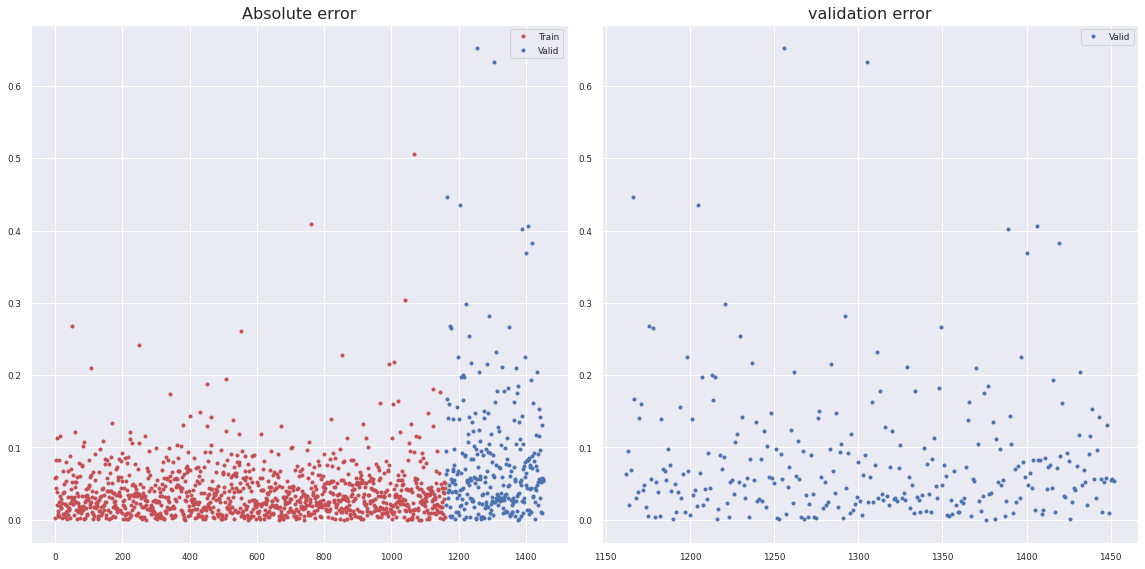

In [32]:
lgb1 = LGBMRegressor(objective = 'regression', 
                     num_leaves=4,
                     learning_rate=0.05,
                     n_estimators=5000,
                     max_depth = 7,
                     max_bin=200,
                     bagging_fraction=0.75,
                     bagging_freq=5,
                     bagging_seed=7,
                     feature_fraction=0.8,)
lgb1 = LGBMRegressor(objective = 'regression',
                     num_leaves = 20,
                     learning_rate = 0.01, 
                     n_estimators = 900, 
                     min_child_weight = 1, 
                     max_bin=200,
                     bagging_fraction=0.75,
                     bagging_freq=5,
                     bagging_seed=7,
                     subsample = 0.8,
                     colsample_bytree=0.8,
                     max_depth = 9,)
lgb2 = LGBMRegressor(num_leaves = 20, learning_rate = 0.01, n_estimators = 900, max_depth = 9,)
lgb3 = LGBMRegressor(num_leaves = 30, learning_rate = 0.01, n_estimators = 800, max_depth = 8,)
if CV_parameters:
    # fit a model
    lgb1.fit(X_train, y_train)
    # display cv results
    raw_models = model_valid(X_train, y_train, [lgb1], cv, 'explained_variance')
    # explained_variance  neg_mean_absolute_error neg_root_mean_squared_error
    display(raw_models)

    plot_model(lgb1, X_train, y_train, X_valid, y_valid)
else:
    pass

In [33]:
def blend_predict(models, X, y, X_test):
    #fit models on the whole training set
    prediction =np.zeros(X_test.shape[0])
    for i in range(len(models)):
        print(i)
        models[i].fit(X,y)
        
        prediction += models[i].predict(X_test)/len(models)
    return prediction

xgb2 = xgb.XGBRegressor(n_estimators=1000,learning_rate=0.02, max_depth=8)
xgb3 = xgb.XGBRegressor(n_estimators=800,learning_rate=0.01, max_depth=8)
lgb2 = LGBMRegressor(num_leaves = 20, learning_rate = 0.01, n_estimators = 900, max_depth = 9,)
lgb3 = LGBMRegressor(num_leaves = 30, learning_rate = 0.01, n_estimators = 800, max_depth = 8,)

models = [xgb1, xgb2, xgb3, lgb1, lgb2, lgb3]
test_prediction =  blend_predict(models, X, y, df_test)



# invert back to original scale
test_prediction = min_max_scaling_inver(test_prediction, df_min[target], df_max[target])

submission1 = pd.read_csv("../input/home-data-for-ml-course/sample_submission.csv")

submission1.loc[:, target] = np.floor(np.expm1(test_prediction))

submission1.to_csv("2model_submission.csv", index=False)
submission1

0
1
2
3
4
5


,Id,SalePrice
0,1461,125562.0
1,1462,159870.0
2,1463,185433.0
3,1464,188375.0
4,1465,182596.0
...,...,...
1454,2915,81676.0
1455,2916,82348.0
1456,2917,159439.0
1457,2918,118209.0


In [34]:
submission1.loc[:, target] = np.floor(np.expm1(test_prediction))

submission1.to_csv("2model_submission.csv", index=False)
submission1

,Id,SalePrice
0,1461,125562.0
1,1462,159870.0
2,1463,185433.0
3,1464,188375.0
4,1465,182596.0
...,...,...
1454,2915,81676.0
1455,2916,82348.0
1456,2917,159439.0
1457,2918,118209.0


In [35]:
# Another stacked model from public notebook

In [36]:
# https://www.kaggle.com/itslek/stack-blend-lrs-xgb-lgb-house-prices-k-v17?scriptVersionId=11006447
import numpy as np  # linear algebra
import pandas as pd  #
from datetime import datetime

from scipy.stats import skew  # for some statistics
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

from mlxtend.regressor import StackingCVRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

import os

print(os.listdir("../input"))
train_path = '../input/home-data-for-ml-course/train.csv'
test_path = '../input/home-data-for-ml-course/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

print("Train set size:", train.shape)
print("Test set size:", test.shape)
print('START data processing', datetime.now(), )

train_ID = train['Id']
test_ID = test['Id']
# Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop(['Id'], axis=1, inplace=True)
test.drop(['Id'], axis=1, inplace=True)

# Deleting outliers
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

# We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])
y = train.SalePrice.reset_index(drop=True)
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

features = pd.concat([train_features, test_features]).reset_index(drop=True)
print(features.shape)
# Some of the non-numeric predictors are stored as numbers; we convert them into strings 
features['MSSubClass'] = features['MSSubClass'].apply(str)
features['YrSold'] = features['YrSold'].astype(str)
features['MoSold'] = features['MoSold'].astype(str)

features['Functional'] = features['Functional'].fillna('Typ')
features['Electrical'] = features['Electrical'].fillna("SBrkr")
features['KitchenQual'] = features['KitchenQual'].fillna("TA")
features['Exterior1st'] = features['Exterior1st'].fillna(features['Exterior1st'].mode()[0])
features['Exterior2nd'] = features['Exterior2nd'].fillna(features['Exterior2nd'].mode()[0])
features['SaleType'] = features['SaleType'].fillna(features['SaleType'].mode()[0])

features["PoolQC"] = features["PoolQC"].fillna("None")

for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    features[col] = features[col].fillna(0)
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    features[col] = features[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    features[col] = features[col].fillna('None')

features['MSZoning'] = features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))

objects = []
for i in features.columns:
    if features[i].dtype == object:
        objects.append(i)

features.update(features[objects].fillna('None'))

features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

# Filling in the rest of the NA's

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics.append(i)
features.update(features[numerics].fillna(0))

numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in features.columns:
    if features[i].dtype in numeric_dtypes:
        numerics2.append(i)

skew_features = features[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
skew_index = high_skew.index

for i in skew_index:
    features[i] = boxcox1p(features[i], boxcox_normmax(features[i] + 1))

features = features.drop(['Utilities', 'Street', 'PoolQC', ], axis=1)

features['YrBltAndRemod'] = features['YearBuilt'] + features['YearRemodAdd']
features['TotalSF'] = features['TotalBsmtSF'] + features['1stFlrSF'] + features['2ndFlrSF']

features['Total_sqr_footage'] = (features['BsmtFinSF1'] + features['BsmtFinSF2'] +
                                 features['1stFlrSF'] + features['2ndFlrSF'])

features['Total_Bathrooms'] = (features['FullBath'] + (0.5 * features['HalfBath']) +
                               features['BsmtFullBath'] + (0.5 * features['BsmtHalfBath']))

features['Total_porch_sf'] = (features['OpenPorchSF'] + features['3SsnPorch'] +
                              features['EnclosedPorch'] + features['ScreenPorch'] +
                              features['WoodDeckSF'])

# simplified features
features['haspool'] = features['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
features['has2ndfloor'] = features['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasgarage'] = features['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
features['hasbsmt'] = features['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
features['hasfireplace'] = features['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

print(features.shape)
final_features = pd.get_dummies(features).reset_index(drop=True)
print(final_features.shape)

X = final_features.iloc[:len(y), :]
X_sub = final_features.iloc[len(X):, :]

print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

outliers = [30, 88, 462, 631, 1322]
X = X.drop(X.index[outliers])
y = y.drop(y.index[outliers])

overfit = []
for i in X.columns:
    counts = X[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(X) * 100 > 90:
        overfit.append(i)

overfit = list(overfit)
overfit.append('MSZoning_C (all)')

X = X.drop(overfit, axis=1).copy()
X_sub = X_sub.drop(overfit, axis=1).copy()

print('X', X.shape, 'y', y.shape, 'X_sub', X_sub.shape)

# ################## ML ########################################
print('START ML', datetime.now(), )

kfolds = KFold(n_splits=5, shuffle=True, random_state=42)


# rmsle
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))


# build our model scoring function
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, y,
                                    scoring="neg_mean_squared_error",
                                    cv=kfolds))
    return rmse


# setup models    
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]
alphas2 = [5e-05, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008]
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95,  1]

ridge = make_pipeline(RobustScaler(),
                      RidgeCV(alphas=alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas=alphas2,
                              random_state=42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(),
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas,
                                        cv=kfolds, l1_ratio=e_l1ratio))

svr = make_pipeline(RobustScaler(),
                    SVR(C=20, epsilon=0.008, gamma=0.0003, ))

gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                max_depth=4, max_features='sqrt',
                                min_samples_leaf=15, min_samples_split=10,
                                loss='huber', random_state=42)

lightgbm = LGBMRegressor(objective='regression',
                         num_leaves=4,
                         learning_rate=0.01,
                         n_estimators=5000,
                         max_bin=200,
                         bagging_fraction=0.75,
                         bagging_freq=5,
                         bagging_seed=7,
                         feature_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1,
                         # min_data_in_leaf=2,
                         # min_sum_hessian_in_leaf=11
                         )

xgboost = XGBRegressor(learning_rate=0.01, n_estimators=3460,
                       max_depth=3, min_child_weight=0,
                       gamma=0, subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror', nthread=-1,
                       scale_pos_weight=1, seed=27,
                       reg_alpha=0.00006)

# stack
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, gbr, xgboost, lightgbm),
                                meta_regressor=xgboost,
                                use_features_in_secondary=True)

print('TEST score on CV')

score = cv_rmse(ridge)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(elasticnet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(svr)
print("SVR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(gbr)
print("GradientBoosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(lightgbm)
print("Lightgbm score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

score = cv_rmse(xgboost)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()), datetime.now(), )

print('START Fit')
print(datetime.now(), 'StackingCVRegressor')
stack_gen_model = stack_gen.fit(np.array(X), np.array(y))
print(datetime.now(), 'elasticnet')
elastic_model_full_data = elasticnet.fit(X, y)
print(datetime.now(), 'lasso')
lasso_model_full_data = lasso.fit(X, y)
print(datetime.now(), 'ridge')
ridge_model_full_data = ridge.fit(X, y)
print(datetime.now(), 'svr')
svr_model_full_data = svr.fit(X, y)
print(datetime.now(), 'GradientBoosting')
gbr_model_full_data = gbr.fit(X, y)
print(datetime.now(), 'xgboost')
xgb_model_full_data = xgboost.fit(X, y)
print(datetime.now(), 'lightgbm')
lgb_model_full_data = lightgbm.fit(X, y)


def blend_models_predict(X=X):
    return ((0.05* elastic_model_full_data.predict(X)) + 
            (0.05 * lasso_model_full_data.predict(X)) + 
            (0.05 * ridge_model_full_data.predict(X)) + 
            (0.05 * svr_model_full_data.predict(X)) + 
            (0.1 * gbr_model_full_data.predict(X)) + 
            (0.25 * xgb_model_full_data.predict(X)) + 
            (0.15 * lgb_model_full_data.predict(X)) + 
            (0.3 * stack_gen_model.predict(np.array(X))))


print('RMSLE score on train data:')
print(rmsle(y, blend_models_predict(X)))
print('MSE score on train data:')
print(mean_squared_error(y, blend_models_predict(X)))
print('MAE score on train data:')
print(mean_absolute_error(np.expm1(y), np.floor(np.expm1(blend_models_predict(X)))))


print('Predict submission', datetime.now(), )
submission2 = pd.read_csv("../input/home-data-for-ml-course/sample_submission.csv")

submission2.iloc[:, 1] = np.floor(np.expm1(blend_models_predict(X_sub)))

submission2.to_csv("House_price_submission.csv", index=False)
print('Save submission', datetime.now(), )

['home-data-for-ml-course']
Train set size: (1460, 81)
Test set size: (1459, 80)
START data processing 2020-09-30 16:32:53.527888
(2917, 79)


/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/opt/conda/lib/python3.7/site-packages/scipy/stats/stats.py:3538: PearsonRNearConstantInputWarning: An input array is nearly constant; the computed correlation coefficent may be inaccurate.
  warnings.warn(PearsonRNearConstantInputWarning())


(2917, 86)
(2917, 333)
X (1458, 333) y (1458,) X_sub (1459, 333)
X (1453, 102) y (1453,) X_sub (1459, 102)
START ML 2020-09-30 16:32:54.156454
TEST score on CV
Kernel Ridge score: 0.1117 (0.0069)
 2020-09-30 16:32:55.099453
Lasso score: 0.1118 (0.0069)
 2020-09-30 16:32:55.710415
ElasticNet score: 0.1118 (0.0070)
 2020-09-30 16:32:57.280964
SVR score: 0.1118 (0.0063)
 2020-09-30 16:32:59.489728
GradientBoosting score: 0.1148 (0.0075)
 2020-09-30 16:33:47.435968
Lightgbm score: 0.1143 (0.0090)
 2020-09-30 16:33:54.216392
Xgboost score: 0.1113 (0.0112)
 2020-09-30 16:34:44.068515
START Fit
2020-09-30 16:34:44.069271 StackingCVRegressor
2020-09-30 16:37:12.164910 elasticnet
2020-09-30 16:37:12.518773 lasso
2020-09-30 16:37:12.658503 ridge
2020-09-30 16:37:12.897447 svr
2020-09-30 16:37:13.473282 GradientBoosting
2020-09-30 16:37:24.579065 xgboost
2020-09-30 16:37:37.191086 lightgbm
RMSLE score on train data:
0.05532228431785131
MSE score on train data:
0.0030605551421451767
MAE score on t

In [37]:
submission2

,Id,SalePrice
0,1461,120868.0
1,1462,161837.0
2,1463,187142.0
3,1464,200105.0
4,1465,180728.0
...,...,...
1454,2915,83220.0
1455,2916,82923.0
1456,2917,175193.0
1457,2918,117110.0


In [38]:
# final blend

In [39]:
submission = 0.5 * submission1 + 0.5 * submission2
output = pd.DataFrame({'Id': df_test.index,
                       'SalePrice': submission})
output.to_csv('submission.csv', index=False)

ValueError: Shape of passed values is (2, 2), indices imply (1459, 2)